<a href="https://colab.research.google.com/github/ShinMini/SPA-Securities-Price-Analysis/blob/mini/s_p500_analizing_app_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------
 ------------- S & P 500 IT기업 Subindusty lists ------------------ 
--------------------------------------------------------------------

                 1. Semiconductor 
                 2. Application Software & Systems Software
                 3. IT Consulting & Other Services
                 4. Data Processing & Outsourced Services 
                 5. Technology Hardware, Storage & Peripherals


--------------------------------------------------------------------

원하시는 번호를 선택해주세요: 4


 ============ 조회할 날짜를 선택하세요. 조회가능 날짜 구간: [ 2017-01-01 ~ 2022--06-31 ]
조회 시작 년도 입력: 2020
조회 시작월 입력: 3
조회 시작일 입력: 10
조회 종료 년도 입력: 2022
조회 종료월 입력: 4
조회 종료일 입력: 1


==============Technology Hardware, Storage & Peripherals섹터의 주요 기업 주가 지표=============


------------ 조회 구간 2020-03-10 ~ 2022-04-01 ----------------------


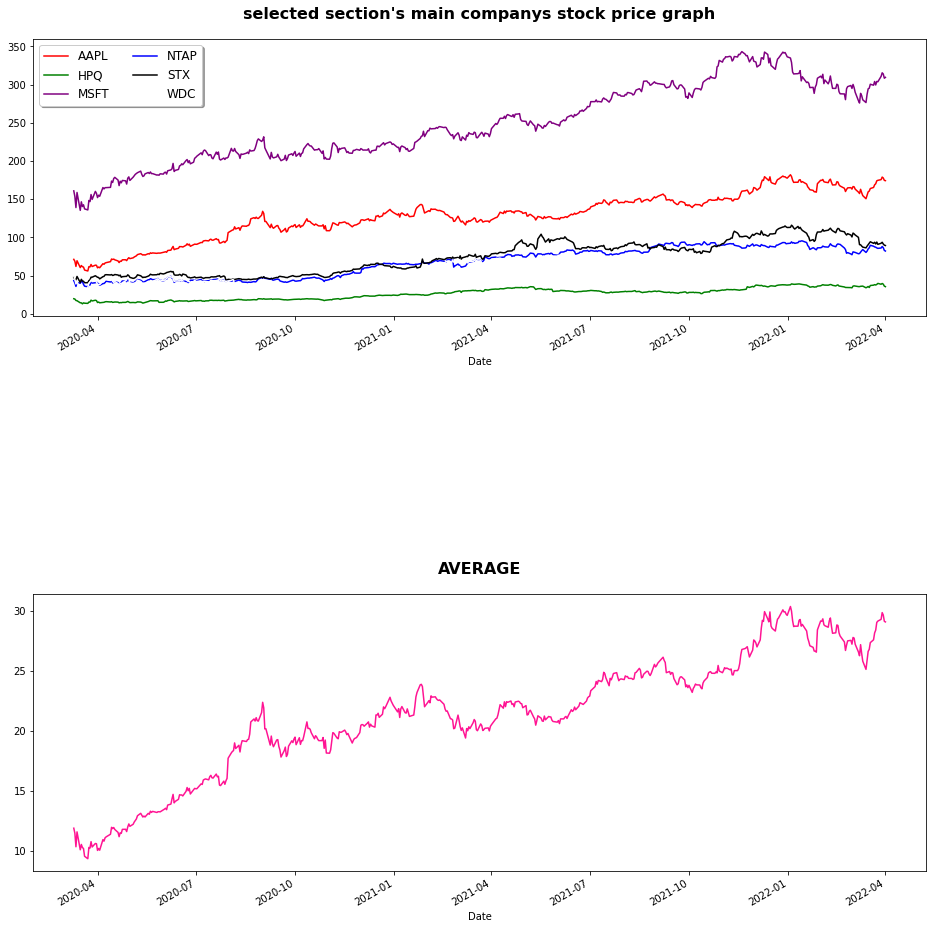


         1. 메인메뉴로 돌아가기
         2. 아무키를 입력해 프로그램 종료하기


KeyboardInterrupt: ignored

In [ ]:
!pip install finance-datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from IPython.display import clear_output

clear_output() # 콘솔 초기화
# ------------------------------------------------------------------------------ 변수 선언부.  
df_spx = fdr.StockListing('S&P500') # ITsp500 주가 데이터 저장된 변수. 
check_error= False # main_menu processing이 제대로 되고있는지 확인하기 위한 변수. 
while_loop = True # 프로그램 반복 체크용 변수. 
# subindusty ticker로 사용할 dictionary 생성 -> structure => { 'subindustry_name1' : [com_list_index1, com_list_inex2, ...], 'subindsurty_name2' : [comlist ...], ... }  // key: string, value: list[string]
subindustry_dict =  {
  'Semiconductors' : ['AMD', 'INTC', 'NVDA', 'ADI', 'AVGO', 'MCHP', 'MU', 'QCOM', 'QRVO', 'TXN'],
  'Data Processing & Outsourced Services' : ['MA', 'V', 'ADP', 'FIS', 'FISV', 'FLT', 'GPN', 'JKHY', 'PAYX'],
  'Application software & Softwares System' : ['ADBE', 'ORCL', 'ADSK', 'CTXS', 'FTNT', 'INTU', 'MSFT', 'NLOK'],
  'Technology Hardware, Storage & Peripherals' : ['AAPL', 'HPQ', 'MSFT', 'NTAP', 'STX', 'WDC'],
  'IT Consulting & Other Services ' : ['DXC', 'IBM', 'ACN', 'CTSH', 'IT']
} 
df_list = []  # 회사별 주가 dataframe이 들어갈 list
title_font = { # 그래프 타이틀 폰트설정. 
      'fontsize': 16,
      'fontweight': 'bold'
}
# ------------------------------------------------------------------------------ 변수 선언부 종료
  
# 함수 선언부 ------------------------------------------------------------------
def quit_check(): # 프로그램을 종료할지 지속할지 결정해주는 함수. -------------- 함수(1)
  print("\n         1. 메인메뉴로 돌아가기")
  print("         2. 아무키를 입력해 프로그램 종료하기")
  input_text = int(input("값을 입력해주세요: "))
  if input_text != 1:
    while_loop = False

# sp500 회사 리스트를 원하는 수만큼 출력해주는 함수.  -------------------------- 함수(2)
def print_sp_list(num):
  print(df_spx.where(df_spx['Sector'] == 'Information Technology').dropna().head(num)) # dropna()를 사용해 NaN로 표기된 회사는 출력하지 않음.  # if df_spx['Sector'] == 'Information Technology':  # 일반적인 if문 사용이 안됨,  numpy.where을 사용해 문제 해결 
  quit_check()

# 선택 섹션에 해당하는 종목의 예측 그래프를 모델링해주는 함수------------------- 함수(3)
def print_finance_graph(num):    

  if num == 1:
   selected_subindustry_str = list(subindustry_dict)[0] # serijkslfjasf 데이터 삽입.
  if num == 2:
    selected_subindustry_str = list(subindustry_dict)[1] # (" Application Software & Systems Software에 해당하는 회사 이름들 ...")
  if num == 3:
    selected_subindustry_str = list(subindustry_dict)[2] # (" IT consulting & Outher Services에 해당하는 회사 이름들 ...")
  if num == 4:
    selected_subindustry_str = list(subindustry_dict)[3] # (" Data Processing & Outsourced Services에 해당하는 회사 이름들 ...")
  if num == 5:
    selected_subindustry_str = list(subindustry_dict)[4] # technology hardware .. 데이터 삽입

  print("\n\n ============ 조회할 날짜를 선택하세요. 조회가능 날짜 구간: [ 2017-01-01 ~ 2022--06-31 ]")
  start_year = int(input("조회 시작 년도 입력: "))
  start_month = int(input("조회 시작월 입력: "))
  start_days = int(input("조회 시작일 입력: "))

  final_year = int(input("조회 종료 년도 입력: "))
  final_month = int(input("조회 종료월 입력: "))
  final_days = int(input("조회 종료일 입력: "))

  if start_month < 10:
    start_month = '0' + str(start_month)
  if final_month < 10:
    final_month = '0' + str(final_month)
  if start_days < 10:
    start_days = '0' + str(start_days)
  if final_days < 10:
    final_days = '0' + str(final_days)

  search_start = str(start_year)+'-'+str(start_month)+'-'+str(start_days)
  search_end = str(final_year)+'-'+str(final_month)+'-'+str(final_days)

  print("\n\n==============" + selected_subindustry_str + "섹터의 주요 기업 주가 지표=============\n\n")
  print("------------ 조회 구간 "+ str(search_start) + " ~ " + str(search_end) +" ----------------------")

  draw_graph(subindustry_dict.get(selected_subindustry_str),str(search_start), str(search_end))

  quit_check()

# main menu창을 그려주는 함수. ------------------------------------------------- 함수(4)
def print_main_menu():
  clear_output()
  print("--------------------------------------------------------------------")
  print(" ------------- S & P 500 IT기업 분석 예측 프로그램 ------------------ ")
  print("--------------------------------------------------------------------\n")
  print("                 1. IT 기업 목록 확인하기           ")
  print("                 2. 예측할 주가 종목선택하기         ")
  print("                 3. 프로그램 종료하기            ")
  print("\n\n--------------------------------------------------------------------")

# 선택한 menu의 옵션 개수 반환 ------------------------------------------------- 함수(5)
def display_menu(check_error, run_function_name):  
  clear_output() # 콘솔창 clear
  if run_function_name == "print_main_menu":
    option_length = 3
    print_main_menu() # 함수 호출과함게 console 창에 표기 + option 개수 받아오기.
  elif run_function_name == "print_sub_menu":
    option_length = 5
    print_sub_menu()

  return option_length

# 선택한 옵션 번호 반환. ------------------------------------------------------- 함수(6)
def check_option(check_error, option_length):   
  if check_error:   # error check
    print("     잘못된 값을 입력하셨습니다. 입력값을 다시 확인해주세요.")
  print("")
  try:
    input_num = int(input("원하시는 번호를 선택해주세요: "))  # 사용자로부터 값을 받아오기.
    if input_num in range(1, option_length+1):
      return input_num # 받아온 수 리턴.  -> 값이 정상적으로 입력된 경우. 
    else:
      check_option(True, option_length)
  except:
      check_option(True, option_length) # 함수 다시 재귀호출. + 에러메세지 표기할거임.  
    

# sub industy 분석 종목들을 표기해주는 함수
def print_sub_menu():
  clear_output() # 콘솔창 clear
  print("--------------------------------------------------------------------")
  print(" ------------- S & P 500 IT기업 Subindusty lists ------------------ ")
  print("--------------------------------------------------------------------\n")
  print("                 1. Semiconductor ")
  print("                 2. Application Software & Systems Software")
  print("                 3. IT Consulting & Other Services")
  print("                 4. Data Processing & Outsourced Services ")
  print("                 5. Technology Hardware, Storage & Peripherals")
  print("\n\n--------------------------------------------------------------------")

  
# start: 조회 시작기간, end: 조회 끝기간. dataframe을 생성해주는 함수. -------- 함수 (7)
def make_df(com_name_arr, start, end): 
  for com_name in com_name_arr:
    df_temp = fdr.DataReader(com_name, start, end)
    df_list.append(df_temp)
  
# 가장 중요한 그래프를 그려주는 함수 ------------------------------------------- 함수(8)
def draw_graph(com_name_arr, search_start, search_end):
  # -------------- 그래프 생성 --------------------
  color_list = ['red', 'green', 'purple', 'blue', 'black', 'white', 'yellow', 'pink', 'skyblue', 'brown'] # 그래프 색상 지정. 
  plt.figure(figsize=(16, 17)) # 전체 그래프 사이즈 설정. 
  plt.subplot(211) # 화면을 2행1열로 나눈 것중 첫번째 / 조회한 모든 회사의 주가 그래프 표기
  plt.title("selected section's main companys stock price graph", fontdict=title_font, pad=20) #그래프 타이틀 설정.
  
  # 함수 사용
  make_df(com_name_arr, search_start, search_end)  # df_list를 생성해줌. -----------------------------------------------(2)
  i=0 
  for df in df_list: # 그래프 생성.  -> 종가기준 그래프. 'Close'
    df['Close'].plot(label=com_name_arr[i], color=color_list[i])
    i+=1
  
  plt.legend(loc='best', ncol=2, fontsize=12, frameon=True, shadow=True) # 범례 표기 

  df_sum = pd.DataFrame() # df_list에 합쳐주기 위한 임시 dataframe (1)
  df_avg = pd.DataFrame() # df_list에 합쳐주기 위한 임시 dataframe (2)
  for df_in_list in df_list: 
    if df_sum.empty:
      df_sum = df_in_list['Close']
    else:
      df_sum + df_in_list['Close']

  df_avg = df_sum/len(df_list)

  plt.subplot(212) #화면을 2행1열로 나눈 것중 두번째
  plt.title("AVERAGE", fontdict=title_font, pad=20) #그래프 이름
  df_avg.plot(label= 'AVG', color='deeppink')
  plt.subplots_adjust(hspace = 1.0) # 간격 설정
  plt.show()
# ----------------------------------------------------------  함수 선언부 종료.

while(while_loop):
  option_nums = display_menu(check_error, "print_main_menu")  # 메인 메뉴에서 옵션 선택하기 
  input_num = check_option(check_error, option_nums)  # 해당 옵션의 input값을 받아오기. 

  if input_num == 1: # 1번 메인메뉴 선택시 실행
    select_num = int(input("조회할 회사의 수를 입력해주세요: "))
    print_sp_list(select_num)
  
  elif input_num == 2: # 2번 메인메뉴 선택시 실행  
    option_nums = display_menu(check_error, "print_sub_menu") # sub menu display
    select_num = check_option(check_error, option_nums)
    print_finance_graph(int(select_num))
  
  elif input_num == 3: # 3번 메인메뉴 선택시 실행
    while_loop = False
    break

!kill $(ps aux | awk '{print $2}') # 프로세스 종료. 